<a href="https://colab.research.google.com/github/brucekim29/colab/blob/main/221007_18%EC%9E%A5RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 18-1 LSTM 이용 뉴스 카테고리 분류


 * np.max() 함수로 y_train 의 종류 구하니 46개 카테고리로 구분되어 있음을 할수있다.(0부터 세기떄문에 1을 더해서 출력해야함)

In [ ]:
from tensorflow.keras.datasets import reuters, imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Activation, MaxPooling1D, Conv1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train) , (x_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2121728/2110848 [==============================] - 0s 0us/step


In [ ]:
# 불러온 데이터 확인

category = np.max(y_train) + 1  # 카테고리 구분을 위해서 불러노는데 인덱스의 수는 0부터 세기때문에 1을 더해서 출력 한다.
print(category, '카테고리')
print(len(x_train), '학습용 뉴스기사')
print(len(x_test), '테스트용 뉴스기사')
print(x_train[0])

46 카테고리
8982 학습용 뉴스기사
2246 테스트용 뉴스기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [ ]:
# 단어의 수를 맞춰준다.

x_train = sequence.pad_sequences(x_train, maxlen=100) # 단어의 수를 100으로 맞춰달라는 입력. 

x_test = sequence.pad_sequences(x_test, maxlen=100) # 기사 단어의 수가 100보다 크면 100개째 단어만 선탣후 나머지 버림,
# 100미만 모자라면 0으로 채운다.

In [ ]:
# 원 - 핫 인코딩 처리를 진행
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
#모델의 구조를 성정해주는 섹션
model = Sequential()
#embedding 층을 새로 추가/  Embedding('불러온 단어의 총수' , '기사당 단어 수') gudtlr
model.add(Embedding(1000, 100)) # 1000개의 word count 를 받아서 100개로 변경
model.add(LSTM(100, activation='tanh'))

model.add(Dense(46, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         100000    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
esc = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
history = model.fit(x_train, y_train, batch_size=20, epochs=200, validation_data=(x_test, y_test), callbacks=[esc])

Epoch 1/200
450/450 [==============================] - 14s 12ms/step - loss: 2.2347 - accuracy: 0.4326 - val_loss: 1.8605 - val_accuracy: 0.5356
Epoch 2/200
450/450 [==============================] - 5s 12ms/step - loss: 1.8330 - accuracy: 0.5295 - val_loss: 2.0598 - val_accuracy: 0.4817
Epoch 3/200
450/450 [==============================] - 5s 10ms/step - loss: 1.7170 - accuracy: 0.5615 - val_loss: 1.6834 - val_accuracy: 0.5690
Epoch 4/200
450/450 [==============================] - 4s 10ms/step - loss: 1.5605 - accuracy: 0.6001 - val_loss: 1.5453 - val_accuracy: 0.6069
Epoch 5/200
450/450 [==============================] - 4s 10ms/step - loss: 1.4021 - accuracy: 0.6406 - val_loss: 1.4123 - val_accuracy: 0.6371
Epoch 6/200
450/450 [==============================] - 4s 10ms/step - loss: 1.2376 - accuracy: 0.6830 - val_loss: 1.3112 - val_accuracy: 0.6701
Epoch 7/200
450/450 [==============================] - 5s 11ms/step - loss: 1.1261 - accuracy: 0.7129 - val_loss: 1.2360 - val_accuracy

In [ ]:
print("\n Test Acuuracy: %.4f" %(model.evaluate(x_test, y_test)[1]))

71/71 [==============================] - 0s 5ms/step - loss: 1.2055 - accuracy: 0.7195

 Test Acuuracy: 0.7195


In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']


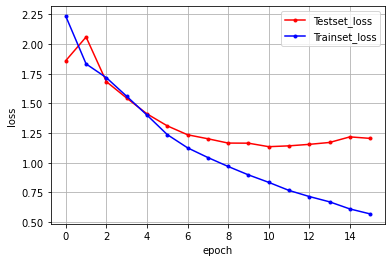

In [ ]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### LSTM과 CNN 조합하여 영호 리뷰 분류하기


* 영화 데이터 베이스 IMDB 영화 관련 정보, 출연진, 개봉일, 영화후기, 평점까지 폭넓게 데이터가 저장된 자료.
* 각 단어에 대한 전처리 마친 상태 데이터 셋.

In [ ]:
# 테스트 셋을 지정 한다.

(a_train, b_train), (a_test, b_test) = imdb.load_data(num_words=5000)

a_train = sequence.pad_sequences(a_train, maxlen=500)
a_test = sequence.pad_sequences(a_test, maxlen=500)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
# 모델의 구조를 설정 해준다.
model_2 = Sequential()
model_2.add(Embedding(5000, 100))
model_2.add(Dropout(0.5))
model_2.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model_2.add(MaxPooling1D(pool_size=4))
model_2.add(LSTM(55))
model_2.add(Dense(1))
model_2.add(Activation('sigmoid'))
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         500000    
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 55)                26400     
                                                                 
 dense (Dense)               (None, 1)                 56        
                                                        

In [ ]:
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early_sc = EarlyStopping(monitor = 'val_loss', patience=3)

history = model_2.fit(a_train, b_train, batch_size = 40, epochs=100, validation_split=0.25, callbacks=[early_sc])

Epoch 1/100
469/469 [==============================] - 114s 237ms/step - loss: 0.4071 - accuracy: 0.8035 - val_loss: 0.3126 - val_accuracy: 0.8725
Epoch 2/100
469/469 [==============================] - 106s 227ms/step - loss: 0.2345 - accuracy: 0.9071 - val_loss: 0.2940 - val_accuracy: 0.8848
Epoch 3/100
469/469 [==============================] - 105s 224ms/step - loss: 0.1874 - accuracy: 0.9291 - val_loss: 0.3256 - val_accuracy: 0.8670
Epoch 4/100
469/469 [==============================] - 106s 226ms/step - loss: 0.1456 - accuracy: 0.9461 - val_loss: 0.3167 - val_accuracy: 0.8768
Epoch 5/100
469/469 [==============================] - 105s 225ms/step - loss: 0.1160 - accuracy: 0.9598 - val_loss: 0.2957 - val_accuracy: 0.8917


In [ ]:
print("\n Test Acuuracy: %.4f" % (model_2.evaluate(a_test, b_test)[1]))

782/782 [==============================] - 4s 5ms/step - loss: 0.3611 - accuracy: 0.8738

 Test Acuuracy: 0.8738


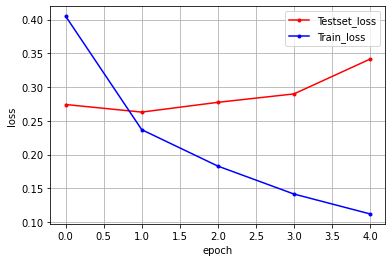

In [ ]:
x_vloss = history.history['val_loss']
x_loss = history.history['loss']


y_len = np.arange(len(x_loss))
plt.plot(y_len, x_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(y_len, x_loss, marker='.', c='blue', label='Train_loss')


plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 18-3 어텐션 사용한 신경망

In [11]:
!pip install attention

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
from attention import Attention

In [16]:
model_a = Sequential()
model_a.add(Embedding(5000, 1500))
model_a.add(Dropout(0.5))
model_a.add(LSTM(64, return_sequences=True))
model_a.add(Attention())
model_a.add(Dropout(0.5))
model_a.add(Dense(1))
model_a.add(Activation('sigmoid'))
model_a.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 1500)        7500000   
                                                                 
 dropout_2 (Dropout)         (None, None, 1500)        0         
                                                                 
 lstm_2 (LSTM)               (None, None, 64)          400640    
                                                                 
 attention (Attention)       (None, 128)               20480     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
 activation_1 (Activation)   (None, 1)                

In [17]:
model_a.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# early_sc = EarlyStopping(monitor = 'val_loss', patience=3)

history = model_a.fit(a_train, b_train, batch_size = 40, epochs=100, validation_data=(a_test, b_test), callbacks=[early_sc])

Epoch 1/100
625/625 [==============================] - 29s 46ms/step - loss: 0.1875 - accuracy: 0.9274 - val_loss: 0.1206 - val_accuracy: 0.9597
Epoch 2/100
625/625 [==============================] - 28s 45ms/step - loss: 0.1179 - accuracy: 0.9552 - val_loss: 0.0763 - val_accuracy: 0.9758
Epoch 3/100
625/625 [==============================] - 27s 44ms/step - loss: 0.0742 - accuracy: 0.9712 - val_loss: 0.0563 - val_accuracy: 0.9819
Epoch 4/100
625/625 [==============================] - 28s 45ms/step - loss: 0.0487 - accuracy: 0.9824 - val_loss: 0.0210 - val_accuracy: 0.9946
Epoch 5/100
625/625 [==============================] - 28s 44ms/step - loss: 0.0345 - accuracy: 0.9876 - val_loss: 0.0108 - val_accuracy: 0.9965
Epoch 6/100
625/625 [==============================] - 27s 44ms/step - loss: 0.0270 - accuracy: 0.9910 - val_loss: 0.0184 - val_accuracy: 0.9933
Epoch 7/100
625/625 [==============================] - 28s 45ms/step - loss: 0.0202 - accuracy: 0.9934 - val_loss: 0.0115 - val_ac

In [20]:
print("\n Test Acuuracy: %.4f" % (model_a.evaluate(a_test, b_test)[1]))

782/782 [==============================] - 10s 12ms/step - loss: 0.7717 - accuracy: 0.8764

 Test Acuuracy: 0.8764


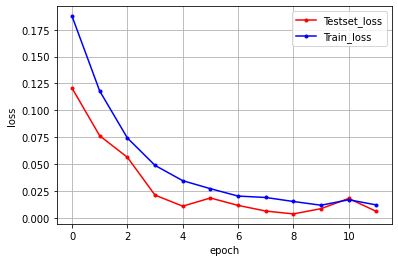

In [21]:
x_vloss = history.history['val_loss']
x_loss = history.history['loss']


y_len = np.arange(len(x_loss))
plt.plot(y_len, x_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(y_len, x_loss, marker='.', c='blue', label='Train_loss')


plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()